Final Model: Multinomial Naïve Bayes (Binary Classification)
Accuracy: 0.8095238095238095
ROC-AUC Score: 0.8272727272727273

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.82      0.82      0.82        11

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21



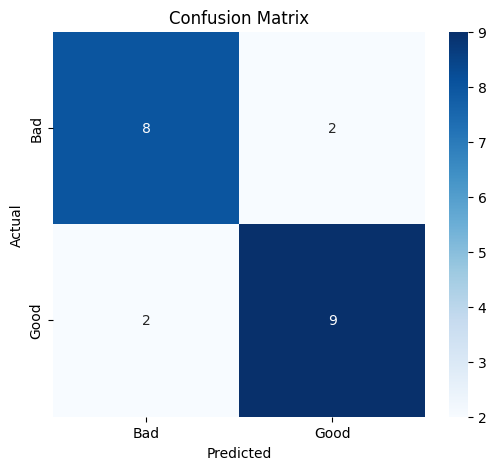

In [1]:
# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.naive_bayes import MultinomialNB

# 2️⃣ Load Dataset
df = pd.read_csv("digital payment data.csv")

# Drop Timestamp if exists
if "Timestamp" in df.columns:
    df = df.drop("Timestamp", axis=1)

# 3️⃣ Encode Target (Binary: Good vs Bad)
target_column = df.columns[-1]

binary_map = {
    "Very Poor": 0,
    "Poor": 0,
    "Average": 0,
    "Good": 1,
    "Very Good": 1
}

df[target_column] = df[target_column].map(binary_map)

# Remove rows with missing target after mapping (if any)
df = df.dropna(subset=[target_column])

# 4️⃣ Encode Features
X = df.drop(target_column, axis=1)
y = df[target_column]

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 5️⃣ Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 6️⃣ Train Model (Multinomial Naïve Bayes with smoothing)
model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 7️⃣ Evaluation
print("Final Model: Multinomial Naïve Bayes (Binary Classification)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# 8️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Bad", "Good"],
            yticklabels=["Bad", "Good"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
